In [ ]:
from IPython.display import HTML
from IPython.display import display

from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display 
import numpy as np
import matplotlib.pyplot as plt
import math

# Tomado de https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=false; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>

Para mostrar/ocultar código presione <a href="javascript:code_toggle()">aquí</a>.''')


def calcularPosicionHorizontal(angulo, v0, t):
    posicionX = math.cos(angulo) * v0 * t
    posicionY = math.sin    (angulo) * v0 * t
    return [posicionX, posicionY]

def calculoVelocidadHorizontal(vo, angulo, tiempo):
    return np.ones(tiempo.shape[0])* vo * math.cos(angulo)

def calcularPosicionVertical(vo, angulo, t):
    return (vo * t * math.sin(angulo) + (-9.81/2)*t*t)

def calculoVelocidadVertical(v0, angulo, t):
    return v0* math.sin(angulo) + -9.81 * t 

def calculoPosicionBidimensional(angulo, vo, t):
    posicionX = vo*t
    posicionz = calcularPosicionVertical(vo, angulo, t)
    return [posicionX, posicionz]

def calculoAceleracion(tiempo):
    return np.ones(tiempo.shape[0])*-9.81

def calculoVelocidadesBidimensional(vo, angulo, t):
    return (calculoVelocidadHorizontal(vo, angulo, t)**2 + calculoVelocidadVertical(vo, angulo, t)**2)**(1/2)

def posicionV():

    display(tag)
    def GraficoInteractivoPosicionV(angulo, velInicial, tiempo):

        arregloTiempo = np.linspace (0, tiempo, 100)
        posiciónActual = calcularPosicionVertical(velInicial, angulo ,arregloTiempo)   
        fig, ax = plt.subplots (dpi=120)    
        ax.set_xlabel('Tiempo $(s)$')
        ax.set_ylabel('Posición en eje z $(m)$')
        plt.xlim (0, 35)
        plt.ylim (-50, 50)
        ax.plot (arregloTiempo, posiciónActual)
        ax.set_title('Posición de una partícula en un plano bidimensional vertical')  
        plt.grid () 
        plt.show()  
        return

    angEtiqueta = widgets.Label (value="Angulo $(°)$:")
    angSlider = widgets.FloatSlider(min=-math.pi, max=math.pi, step=0.1, value=0.0)
    cajaAngulo = widgets.HBox([angEtiqueta, angSlider])

    velEtiqueta = widgets.Label (value="Velocidad Inicial $(m/s)$:")
    velSlider = widgets.IntSlider(min=1, max=50, step=1, value=0.0)
    cajaVelocidad = widgets.HBox([velEtiqueta, velSlider])

    play = widgets.Play(value=0, min=0, max=30, step=2, disabled=False)
    tieEtiqueta = widgets.Label (value="Tiempo $(s)$:")
    tieSlider = widgets.IntSlider(min=0, max=30,)
    widgets.jslink((play, 'value'), (tieSlider, 'value'))
    cajaTiempo = widgets.HBox([tieEtiqueta, tieSlider])

    salida = widgets.interactive_output(GraficoInteractivoPosicionV, {'angulo':angSlider,
                                                                  'velInicial':velSlider,
                                                                  'tiempo':tieSlider})

    display(cajaAngulo, cajaVelocidad, cajaTiempo, play, salida)

def velocidadV():

    display(tag)
    def GraficoInteractivoVelocidadV(angulo, velInicial, tiempo):

        arregloTiempo = np.linspace (0, tiempo, 100)
        posiciónActual = calculoVelocidadVertical(velInicial, angulo ,arregloTiempo)   
        fig, ax = plt.subplots (dpi=120)    
        ax.set_xlabel('Tiempo $(s)$')
        ax.set_ylabel('Velocidad en eje z $(m/s)$')
        plt.xlim (0, 35)
        plt.ylim (-50, 50)
        ax.plot (arregloTiempo, posiciónActual)
        ax.set_title('Velocidad vy en la partícula')  
        plt.grid () 
        plt.show()  
        return

    angEtiqueta = widgets.Label (value="Angulo $(°)$:")
    angSlider = widgets.FloatSlider(min=-math.pi, max=math.pi, step=0.1, value=0.0)
    cajaAngulo = widgets.HBox([angEtiqueta, angSlider])

    velEtiqueta = widgets.Label (value="Velocidad Inicial $(m/s)$:")
    velSlider = widgets.IntSlider(min=1, max=50, step=1, value=0.0)
    cajaVelocidad = widgets.HBox([velEtiqueta, velSlider])

    play = widgets.Play(value=0, min=0, max=30, step=2, disabled=False)
    tieEtiqueta = widgets.Label (value="Tiempo $(s)$:")
    tieSlider = widgets.IntSlider(min=0, max=30,)
    widgets.jslink((play, 'value'), (tieSlider, 'value'))
    cajaTiempo = widgets.HBox([tieEtiqueta, tieSlider])

    salida = widgets.interactive_output(GraficoInteractivoVelocidadV, {'angulo':angSlider,
                                                                  'velInicial':velSlider,
                                                                  'tiempo':tieSlider})

    display(cajaAngulo, cajaVelocidad, cajaTiempo, play, salida)

def aceleracionV():

    display(tag)
    def GraficoInteractivoAceleracionV(tiempo):

        arregloTiempo = np.linspace (0, tiempo, 100)
        aceleracionActual = calculoAceleracion(arregloTiempo)  
        fig, ax = plt.subplots (dpi=120)    
        ax.set_xlabel('Tiempo $(s)$')
        ax.set_ylabel('Aceleración $(m/s^2)$')
        plt.xlim (0, 35)
        plt.ylim (-50, 50)
        ax.plot (arregloTiempo, aceleracionActual)
        ax.set_title('Aceleración de una partícula en el espacio')  
        plt.grid () 
        plt.show()  
        return


    play = widgets.Play(value=0, min=0, max=30, step=2, disabled=False)
    tieEtiqueta = widgets.Label (value="Tiempo $(s)$:")
    tieSlider = widgets.IntSlider(min=0, max=30,)
    widgets.jslink((play, 'value'), (tieSlider, 'value'))
    cajaTiempo = widgets.HBox([tieEtiqueta, tieSlider])

    salida = widgets.interactive_output(GraficoInteractivoAceleracionV, {'tiempo':tieSlider})

    display( cajaTiempo, play, salida)

def velocidadH():

    display(tag)
    def GraficoInteractivoVelocidadH(angulo, velInicial, tiempo):

        arregloTiempo = np.linspace (0, tiempo, 100)
        posiciónActual = calculoVelocidadHorizontal(velInicial, angulo ,arregloTiempo)   
        fig, ax = plt.subplots (dpi=120)    
        ax.set_xlabel('Velocidad en plano horizontal $(m/s)$')
        ax.set_ylabel('Tiempo $(s)$')
        plt.xlim (0, 35)
        plt.ylim (-50, 50)
        ax.plot (arregloTiempo, posiciónActual)
        ax.set_title('Velocidad de una partícula en un plano horizontal')  
        plt.grid () 
        plt.show()  
        return

    angEtiqueta = widgets.Label (value="Angulo $(°)$:")
    angSlider = widgets.FloatSlider(min=-math.pi, max=math.pi, step=0.1, value=0.0)
    cajaAngulo = widgets.HBox([angEtiqueta, angSlider])

    velEtiqueta = widgets.Label (value="Velocidad Inicial $(m/s)$:")
    velSlider = widgets.IntSlider(min=1, max=50, step=1, value=0.0)
    cajaVelocidad = widgets.HBox([velEtiqueta, velSlider])

    play = widgets.Play(value=0, min=0, max=30, step=2, disabled=False)
    tieEtiqueta = widgets.Label (value="Tiempo $(s)$:")
    tieSlider = widgets.IntSlider(min=0, max=30,)
    widgets.jslink((play, 'value'), (tieSlider, 'value'))
    cajaTiempo = widgets.HBox([tieEtiqueta, tieSlider])

    salida = widgets.interactive_output(GraficoInteractivoVelocidadH, {'angulo':angSlider,
                                                                  'velInicial':velSlider,
                                                                  'tiempo':tieSlider})

    display(cajaAngulo, cajaVelocidad, cajaTiempo, play, salida)

def posicionH():

    display(tag)
    def GraficoInteractivoPosicionH(angulo, velInicial, tiempo):

        arregloTiempo = np.linspace (0, tiempo, 100)
        posicionActual = calcularPosicionHorizontal(angulo, velInicial ,arregloTiempo)   
        fig, ax = plt.subplots (dpi=120)    
        ax.set_xlabel('Posicion en X $(m)$')
        ax.set_ylabel('Posición en eje Y $(m)$')
        plt.xlim (0, 35)
        plt.ylim (0, 50)
        ax.plot (posicionActual[0], posicionActual[1])
        ax.set_title('Posición de una partícula en un plano horizontal  ')  
        plt.grid () 
        plt.show()  
        return

    angEtiqueta = widgets.Label (value="Angulo $(°)$:")
    angSlider = widgets.FloatSlider(min=-math.pi, max=math.pi, step=0.1, value=0.0)
    cajaAngulo = widgets.HBox([angEtiqueta, angSlider])

    velEtiqueta = widgets.Label (value="Velocidad Inicial $(m/s)$:")
    velSlider = widgets.IntSlider(min=1, max=50, step=1, value=0.0)
    cajaVelocidad = widgets.HBox([velEtiqueta, velSlider])

    play = widgets.Play(value=0, min=0, max=30, step=2, disabled=False)
    tieEtiqueta = widgets.Label (value="Tiempo $(s)$:")
    tieSlider = widgets.IntSlider(min=0, max=30,)
    widgets.jslink((play, 'value'), (tieSlider, 'value'))
    cajaTiempo = widgets.HBox([tieEtiqueta, tieSlider])

    salida = widgets.interactive_output(GraficoInteractivoPosicionH, {'angulo':angSlider,
                                                                  'velInicial':velSlider,
                                                                  'tiempo':tieSlider})

    display(cajaAngulo, cajaVelocidad, cajaTiempo, play, salida)


def graficasVarias ():
    
    display (tag)
    
    def GraficoInteractivoGeneral(angulo, velInicial, tiempo):

      arregloTiempo = np.linspace (0, tiempo, 100)

      posiciónActual = calculoPosicionBidimensional (angulo, velInicial, arregloTiempo)
      velocidadActual = calculoVelocidadesBidimensional (velInicial, angulo, arregloTiempo)
      aceleraciónActual = calculoAceleracion(arregloTiempo)

      fig,(ax1, ax2, ax3) = plt.subplots (1, 3, figsize = (20,7), dpi= 120, sharex = True)

      ax1.set_xlabel('Posicion X $(m)$')
      ax1.set_ylabel('Posicion Y $(m)$')
      ax1.plot (posiciónActual[0], posiciónActual[1])
      ax1.set_xlim([0,20]) 
      ax1.set_ylim([0,20])  
    
      ax1. grid ()
        
      ax2.set_xlabel('Tiempo $(s)$')
      ax2.set_ylabel('Velocidad $(m/s)$')
      ax2.plot (arregloTiempo, velocidadActual) 
      ax2.set_xlim([0,6])
      ax2.set_ylim([0,10]) 
        
      ax2.grid ()
    
      ax3.set_xlabel('Tiempo $(s)$')
      ax3.set_ylabel('Aceleración $(m/s^2)$')
      ax1.set_xlim([0,6])
      ax3.set_ylim([-10, 0]) 
      ax3.plot (arregloTiempo, aceleraciónActual)

      ax3.grid ()
    
      plt.show()

      return


    angEtiqueta = widgets.Label (value="Angulo $(rad)$:")
    angSlider = widgets.FloatSlider(min=-math.pi, max=math.pi, step=0.1, value=0.0)
    cajaPosición = widgets.HBox([angEtiqueta, angSlider])

    velEtiqueta = widgets.Label (value="Velocidad Inicial $(m/s)$:")
    velSlider = widgets.FloatSlider(min=1, max=10, step=0.01, value=0.0)
    cajaVelocidad = widgets.HBox([velEtiqueta, velSlider])


    play = widgets.Play(value=0, min=0, max=30, step=2, disabled=False)
    tieEtiqueta = widgets.Label (value="Tiempo $(s)$:")
    tieSlider = widgets.IntSlider(min=0, max=30,)
    widgets.jslink((play, 'value'), (tieSlider, 'value'))
    cajaTiempo = widgets.HBox([tieEtiqueta, tieSlider])

    salida = widgets.interactive_output(GraficoInteractivoGeneral, {'angulo':angSlider,
                                                                  'velInicial':velSlider,
                                                                  'tiempo':tieSlider})

    display(cajaPosición, cajaVelocidad, cajaTiempo, play, salida)



# Movimiento Parabólico Bidimensional

Un movimiento de proyectil tiene las caracteristicas de ser lanzado de una altura dada con una velocidad inicial dada como V0 a cierto ángulo. La fuerza del peso actuará en contra de el movimiento al inicio mientras toma altura.

Al ser un movimiento bidimensional, tendremos que tomar en cuentas la componente horizontal del movimiento, así como la altura.

El movimiento horizontal será una superposicíon vectorial entre eje "y" y eje "x".

Las ecuaciones serán las siguientes:

$$
a_x = 0
$$

$$
a_y = 0
$$

$$
a_z = -g
$$

$$
v_y = v_0y+gt
$$


$$
y = v_0yt-\dfrac{1}{2}gt+y_0
$$

Seguidamente podremos observar algunas de las iteraciones gráficas que siguen las partículas en este  tipo de movimiento.

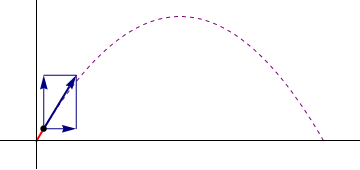


Notamos que el angulo que pondremos será respecto entre los ejes "x" y "y".

# Analisis del plano horizontal:
## Posicion:

In [ ]:
posicionH()

## Velocidad:

In [ ]:
velocidadH()

Notamos que los siguientes angulos se daran entre el plano "xy" y el eje "z"

# Analisis del plano vertical:

## Posicion:


In [ ]:
posicionV()

## Velocidad:

In [ ]:
velocidadV()

## Aceleración:

In [ ]:
aceleracionV()

# Analisis bidimensional:

In [ ]:
graficasVarias()